# Tugas Praktikum

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# (Baca Data)
data = pd.read_csv('C:\\kuliah\\Machine Leaning\\2341720003_ML_2025\\data\\insurance.csv')

# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
# 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
# Variabel bebas (fitur)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Variabel target
y = data['charges']

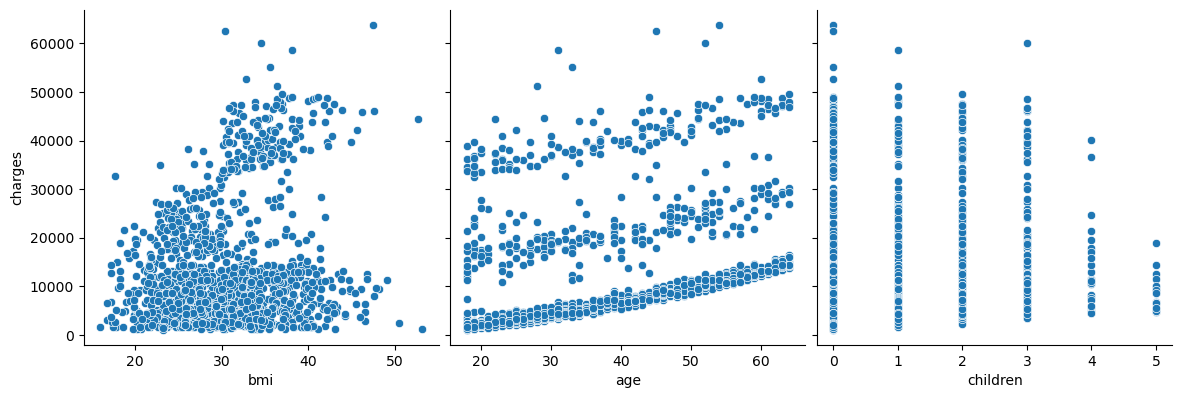

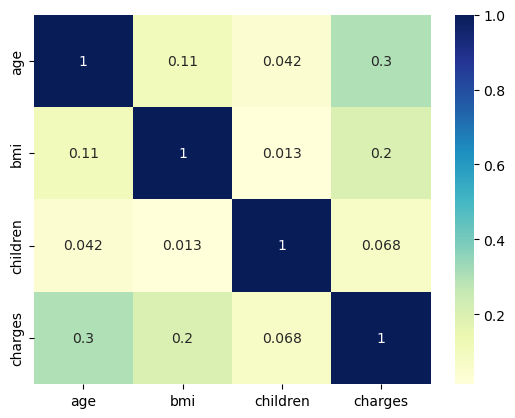

In [56]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['bmi', 'age', 'children'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

# visualisasi korelasi dengan heatmap
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [57]:
# 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
from sklearn.model_selection import train_test_split
X = data[['age']]
y = data['charges']

# Pembagian data latih dan data uji (proporsi 70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    test_size=0.3,
    random_state=100
)

print("Jumlah data latih :", X_train.shape[0])
print("Jumlah data uji   :", X_test.shape[0])


Jumlah data latih : 936
Jumlah data uji   : 402


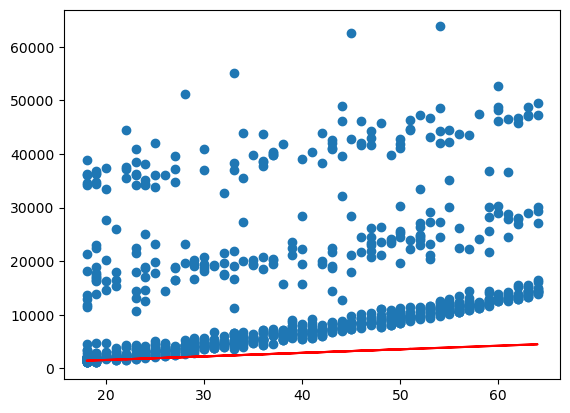

In [58]:
# Training model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

In [59]:
# 3. Lakukan feature scaling jika diperlukan.
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik yang akan dipakai (hindari variabel kategorikal untuk StandardScaler)
numeric_features = ['age', 'bmi', 'children']

# Inisialisasi scaler
scaler = StandardScaler()

# Fit + transform fitur numerik
X_scaled = scaler.fit_transform(data[numeric_features])

# Bentuk kembali ke DataFrame (opsional, untuk kemudahan melihat hasil)
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features)

print("Preview fitur setelah scaling:")
print(X_scaled_df.head())


Preview fitur setelah scaling:
        age       bmi  children
0 -1.438764 -0.453320 -0.908614
1 -1.509965  0.509621 -0.078767
2 -0.797954  0.383307  1.580926
3 -0.441948 -1.305531 -0.908614
4 -0.513149 -0.292556 -0.908614


In [60]:
# 4. Buat model multiple linear regression menggunakan Scikit-Learn.

from sklearn.linear_model import LinearRegression

X = data[['age', 'bmi', 'children']]
y = data['charges']

# Membagi data menjadi data latih dan data uji (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=42
)

# Inisialisasi model Multiple Linear Regression
model = LinearRegression()

In [61]:
# 5.Latih model pada data latih dan lakukan prediksi pada data uji.

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung R-squared (R²)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil
print("=== Hasil Prediksi Biaya Asuransi (Charges) ===")
for i in range(5):
    print(f"Data Test {i+1}: Prediksi = ${y_pred[i]:.2f}, Aktual = ${y_test.iloc[i]:.2f}")

print("\nIntercept (α):", model.intercept_)
print("Koefisien (β):", model.coef_)
print(f"R-squared (R²): {r2:.3f}")

=== Hasil Prediksi Biaya Asuransi (Charges) ===
Data Test 1: Prediksi = $13479.06, Aktual = $9095.07
Data Test 2: Prediksi = $11760.14, Aktual = $5272.18
Data Test 3: Prediksi = $17121.15, Aktual = $29330.98
Data Test 4: Prediksi = $14541.04, Aktual = $9301.89
Data Test 5: Prediksi = $8504.10, Aktual = $33750.29

Intercept (α): -6558.44454239259
Koefisien (β): [229.03485881 335.55393246 641.68292213]
R-squared (R²): 0.131


In [62]:
# 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 9079.649028580896
MSE: 127399626.37416688
RMSE: 11287.144296684031
R-squared: 0.13111524136803365
